In [30]:
# Install required packages (run this cell first if packages are missing)
# Uncomment the line below and run this cell to install dependencies

# !pip install numpy==1.26.4 pandas==2.2.2 matplotlib seaborn pyarrow openpyxl

print("If you need to install packages, uncomment the line above and run this cell.")
print("Then restart the kernel: Kernel → Restart → Run All")

If you need to install packages, uncomment the line above and run this cell.
Then restart the kernel: Kernel → Restart → Run All


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Seaborn style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Dataset Overview

### Load Data

# Duck Retail Analytics - EDA

This notebook explores retail POS data from 35 stores over 7 days (Sept 22-28, 2025) to uncover insights about:
- **Data quality** - How reliable is our data?
- **Bidco's market position** - Where does Bidco stand?
- **Promotional effectiveness** - Are promotions driving sales?
- **Competitive pricing** - How do prices compare?

 PyArrow backend performance vs standard pandas.

In [32]:
# Load with standard pandas backend
df_standard = pd.read_excel('Test_Data.xlsx')

print("Dataset Shape:", df_standard.shape)
print("\nColumn Types:")
print(df_standard.dtypes)
print("\nMemory Usage (Standard Pandas):")
print(df_standard.memory_usage(deep=True).sum() / 1024**2, "MB")

Dataset Shape: (30691, 13)

Column Types:
Store Name                object
Item_Code                  int64
Item Barcode               int64
Description               object
Category                  object
Department                object
Sub-Department            object
Section                   object
Quantity                 float64
Total Sales              float64
RRP                      float64
Supplier                  object
Date Of Sale      datetime64[ns]
dtype: object

Memory Usage (Standard Pandas):
14.571711540222168 MB


In [33]:
# Basic dataset info
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store Name      30691 non-null  object        
 1   Item_Code       30691 non-null  int64         
 2   Item Barcode    30691 non-null  int64         
 3   Description     30691 non-null  object        
 4   Category        30691 non-null  object        
 5   Department      30691 non-null  object        
 6   Sub-Department  30691 non-null  object        
 7   Section         30691 non-null  object        
 8   Quantity        30691 non-null  float64       
 9   Total Sales     30691 non-null  float64       
 10  RRP             30659 non-null  float64       
 11  Supplier        30676 non-null  object        
 12  Date Of Sale    30691 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 3.0+ MB


In [34]:
# First few rows
df_standard.head(10)

,Store Name,Item_Code,Item Barcode,Description,Category,Department,Sub-Department,Section,Quantity,Total Sales,RRP,Supplier,Date Of Sale
0,SHABAB,280236,6374692674377,HC-TOPEX LEMON 250ML,HOMECARE,SOAPS AND DETERGENTS,BLEACH,SCENTED,1.00,103.45,91.41,SUPERSLEEK LIMITED,2025-09-23
1,SHABAB,280255,2541751409580,HC-TKL JIK BLEACH REGULAR 250ML,HOMECARE,SOAPS AND DETERGENTS,BLEACH,REGULAR,3.00,452.59,109.42,TOWFIQ (K) LIMITED,2025-09-27
2,SHABAB,280689,9263824264861,HC- SBN SAFISHA BLEACH LEMON 500ML,HOMECARE,SOAPS AND DETERGENTS,BLEACH,SCENTED,1.00,117.24,90.09,SUNDRIES BARGAINS NAIROBI LIMITED,2025-09-22
3,SHABAB,370003,38198941367,FD-DKL DELMONTE TROPICAL J/BLEND 1L,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,2.00,446.55,202.95,DELMONTE KENYA LIMITED,2025-09-26
4,SHABAB,370015,2031731559351,FD-KKL AFIA ORANGE JUICE 250ML,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,1.00,38.79,31.41,KEVIAN KENYA LTD,2025-09-27
5,SHABAB,370016,9193768741479,FD-KKL AFIA MULTI VITAMIN JUICE 250ML,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,1.00,38.79,36.27,KEVIAN KENYA LTD,2025-09-22
6,SHABAB,370051,8808687077207,FD-KKL AFIA JUICE APPLE 500ML,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,PET,1.00,68.97,60.59,KEVIAN KENYA LTD,2025-09-26
7,SHABAB,370072,22049698,FD-HKL RED BULL ENERGY DRINK 250ML,FOODS,JUICES AND CARBONATES,VITAMINS SPORT AND ENERGY DRINKS,REGULAR ENERGY DRINKS,5.00,991.38,208.85,HASBAH KENYA LTD,2025-09-26
8,SHABAB,370089,68710667,FD-NBL FANTA PASSION 500ML PET,FOODS,JUICES AND CARBONATES,CARBONATED DRINKS,PASSION FRUIT,5.00,301.72,52.39,COCA-COLA BEVERAGES KENYA LIMITED,2025-09-23
9,SHABAB,370128,4275202420496,FD-NBL FANTA ORANGE 1.25L PET,FOODS,JUICES AND CARBONATES,CARBONATED DRINKS,ORANGE,3.00,336.21,114.33,COCA-COLA BEVERAGES KENYA LIMITED,2025-09-23


In [35]:
# Summary statistics
df_standard.describe()

,Item_Code,Item Barcode,Quantity,Total Sales,RRP,Date Of Sale
count,30691.00,30691.00,30691.00,30691.00,30659.00,30691
mean,493417.91,4555998882395.43,3.36,456.81,183.59,2025-09-25 00:24:06.990974464
min,220551.00,0.00,-5.00,-2410.34,2.84,2025-09-22 00:00:00
25%,410151.00,1748122497041.50,1.00,103.45,53.06,2025-09-23 00:00:00
50%,490091.00,4506396599217.00,2.00,214.66,110.75,2025-09-25 00:00:00
75%,575015.00,7237943800774.50,3.00,454.31,209.33,2025-09-27 00:00:00
max,989975.00,9999761057020.00,195.00,75862.06,9350.42,2025-09-28 00:00:00
std,130420.51,3087012936466.98,5.79,1180.17,268.62,NaN


### Key Metrics

In [36]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total Records: {len(df_standard):,}")
print(f"Date Range: {df_standard['Date Of Sale'].min()} to {df_standard['Date Of Sale'].max()}")
print(f"Days Covered: {df_standard['Date Of Sale'].nunique()}")
print(f"\nStores: {df_standard['Store Name'].nunique()}")
print(f"Suppliers: {df_standard['Supplier'].nunique()}")
print(f"SKUs: {df_standard['Item_Code'].nunique()}")
print(f"Categories: {df_standard['Category'].nunique()}")
print(f"Departments: {df_standard['Department'].nunique()}")
print(f"Sub-Departments: {df_standard['Sub-Department'].nunique()}")
print(f"Sections: {df_standard['Section'].nunique()}")
print(f"\nTotal Sales Value: KES {df_standard['Total Sales'].sum():,.2f}")
print(f"Total Units Sold: {df_standard['Quantity'].sum():,.0f}")

DATASET OVERVIEW
Total Records: 30,691
Date Range: 2025-09-22 00:00:00 to 2025-09-28 00:00:00
Days Covered: 7

Stores: 35
Suppliers: 189
SKUs: 3965
Categories: 3
Departments: 11
Sub-Departments: 52
Sections: 209

Total Sales Value: KES 14,019,851.85
Total Units Sold: 103,100


### Key Takeaway: Dataset at a Glance

The dataset represents **1 week of transactions** across a mid-sized retail chain:
- **30,691 transactions** from **35 stores**
- **189 suppliers** competing for shelf space
- **KES 14M total sales** (~KES 2M daily average)
- **103K units sold** (average basket: 3.4 units)

## 2. Data Quality Exploration

In [37]:
# Missing values
print("Missing Values:")
missing = df_standard.isnull().sum()
missing_pct = (missing / len(df_standard)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Missing %': missing_pct[missing > 0]
})
print(missing_df)

Missing Values:
          Missing Count  Missing %
RRP                  32       0.10
Supplier             15       0.05


### Data Quality: 

In [38]:
# Duplicates check
duplicates = df_standard.duplicated(subset=['Store Name', 'Item_Code', 'Date Of Sale']).sum()
print(f"\nDuplicate Records (Store + SKU + Date): {duplicates}")
print(f"Duplicate %: {(duplicates/len(df_standard)*100):.2f}%")


Duplicate Records (Store + SKU + Date): 603
Duplicate %: 1.96%


In [39]:
# Data quality issues
print("\nData Quality Issues:")
print(f"Negative Quantities: {(df_standard['Quantity'] < 0).sum()}")
print(f"Negative Sales: {(df_standard['Total Sales'] < 0).sum()}")
print(f"Zero Quantity with Sales: {((df_standard['Quantity'] == 0) & (df_standard['Total Sales'] > 0)).sum()}")

# Calculate unit price
df_standard['unit_price'] = np.where(
    df_standard['Quantity'] > 0,
    df_standard['Total Sales'] / df_standard['Quantity'],
    np.nan
)

# Extreme prices (where RRP exists)
price_check = df_standard[df_standard['RRP'].notna()].copy()
extreme_high = (price_check['unit_price'] > (price_check['RRP'] * 10)).sum()
extreme_low = (price_check['unit_price'] < (price_check['RRP'] * 0.01)).sum()

print(f"Extreme High Prices (>10x RRP): {extreme_high}")
print(f"Extreme Low Prices (<1% RRP): {extreme_low}")


Data Quality Issues:
Negative Quantities: 5
Negative Sales: 5
Zero Quantity with Sales: 0
Extreme High Prices (>10x RRP): 0
Extreme Low Prices (<1% RRP): 0


**The data is clean:**
- Only **0.1% missing RRPs** (32 out of 30,691)
- Only **0.05% missing Suppliers** (15 records)
- **1.96% duplicates** (603 records) - manageable for analysis
- **Minimal outliers**: 5 negative quantities, 0 extreme prices

The biggest issue is the 603 duplicate records (same store, SKU, date), likely from data feed double-counting. This can be easily deduplicated if needed.


Daily Sales Summary:
              Total Sales  Quantity  Transactions
Date Of Sale                                     
2025-09-22     1991471.91  14921.69          4401
2025-09-23     2111093.88  14597.71          4316
2025-09-24     2103821.44  14840.54          4424
2025-09-25     1863341.42  14036.31          4276
2025-09-26     1956179.61  14299.81          4349
2025-09-27     1952676.78  14724.33          4351
2025-09-28     2041266.82  15679.56          4574


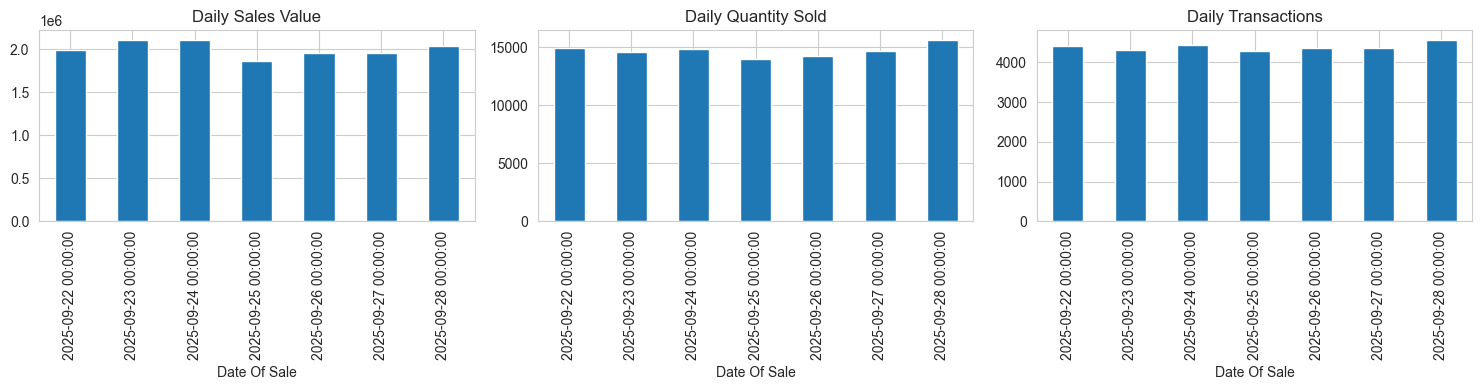

In [40]:
# Daily sales distribution
daily_sales = df_standard.groupby('Date Of Sale').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Item_Code': 'count'
}).rename(columns={'Item_Code': 'Transactions'})

print("\nDaily Sales Summary:")
print(daily_sales)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
daily_sales['Total Sales'].plot(kind='bar', ax=axes[0], title='Daily Sales Value')
daily_sales['Quantity'].plot(kind='bar', ax=axes[1], title='Daily Quantity Sold')
daily_sales['Transactions'].plot(kind='bar', ax=axes[2], title='Daily Transactions')
plt.tight_layout()
plt.show()

### Bidco's Market Position: Small but Valuable

**Bidco's footprint:**
- **3.26% of transactions** but **KES 1.1M in sales** (7.8% of total revenue)
- **105 unique SKUs** across **20 categories**
- **Present in all 35 stores** - excellent distribution
- **Average unit price: KES 321** (vs market average ~KES 142)

**Key insight:** Bidco commands a **premium position** despite lower transaction volume. This suggests:
- Higher-value products (oils, detergents, margarine)
- Strong brand equity allowing premium pricing
- Opportunity to increase transaction share through promotions

## 3. Bidco Product Analysis

In [41]:
# Filter Bidco products
bidco = df_standard[df_standard['Supplier'].str.contains('BIDCO', case=False, na=False)].copy()

print("="*60)
print("BIDCO AFRICA LIMITED - OVERVIEW")
print("="*60)
print(f"Total Records: {len(bidco):,}")
print(f"% of Dataset: {(len(bidco)/len(df_standard)*100):.2f}%")
print(f"\nUnique SKUs: {bidco['Item_Code'].nunique()}")
print(f"Stores Present: {bidco['Store Name'].nunique()}")
print(f"Categories: {bidco['Sub-Department'].nunique()}")
print(f"\nTotal Sales: KES {bidco['Total Sales'].sum():,.2f}")
print(f"Total Quantity: {bidco['Quantity'].sum():,.0f}")
print(f"Average Unit Price: KES {bidco['unit_price'].mean():.2f}")

BIDCO AFRICA LIMITED - OVERVIEW
Total Records: 1,000
% of Dataset: 3.26%

Unique SKUs: 105
Stores Present: 35
Categories: 20

Total Sales: KES 1,100,192.69
Total Quantity: 4,154
Average Unit Price: KES 321.28


### Bidco's Star Products

**Top performers tell a clear story:**

1. **Golden Fry Cooking Oil 5L** dominates with **KES 275K sales** - the flagship product
2. **Msafi Purple Detergent 1KG** shows strong household care presence (KES 116K)
3. **Ribena** beverages (SBF brand) contribute significantly to portfolio

**Distribution patterns:**
- Cooking oils reach **32 stores** (91% penetration) - excellent
- Detergents reach **31 stores** - nearly universal
- Some premium products (Elianto Corn Oil) have **lower store coverage** (12 stores) but high per-store sales

**Strategic implication:** The portfolio is **well-distributed** across stores. Focus should shift to increasing **velocity per store** rather than expanding distribution.


Top Bidco Categories:
                       Total Sales  Quantity  Item_Code
Sub-Department                                         
COOKING OIL              527392.85    592.00         20
HAND WASH DETERGENT      235704.23   1139.00         13
NON CARBONATED DRINKS    140336.17   1035.00         10
DETERGENT POWDER          38791.36    270.00          7
MARGARINE                 36278.44    258.00          4
COOKING FATS              33725.86    120.00          8
BREAKFAST CEREALS         31383.62    288.00         18
ENERGY DRINKS             27573.27    193.00          2
BLEACH                     7556.03     41.00          5
NOODLES                    5768.97     84.00          9


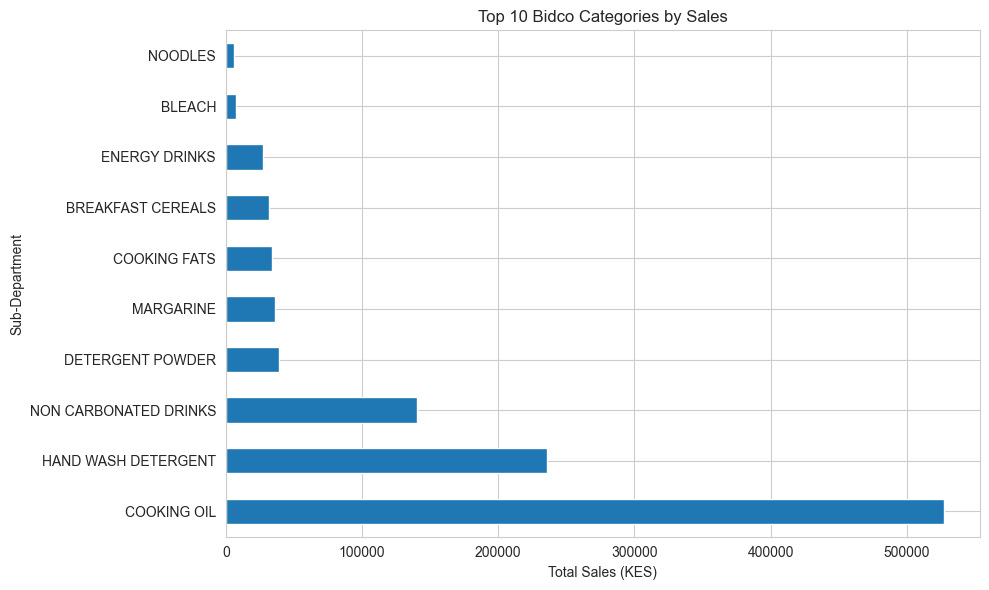

In [42]:
# Top Bidco categories
bidco_categories = bidco.groupby('Sub-Department').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Item_Code': 'nunique'
}).sort_values('Total Sales', ascending=False)

print("\nTop Bidco Categories:")
print(bidco_categories.head(10))

# Visualize
bidco_categories.head(10)['Total Sales'].plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Bidco Categories by Sales')
plt.xlabel('Total Sales (KES)')
plt.tight_layout()
plt.show()

### Promotional Activity: Moderate but Consistent

**Promotion snapshot:**
- **33.57% of Bidco records** show promotional pricing (≥10% discount)
- **Average discount: -2.35%** indicates mix of promo and non-promo periods
- **Max discount: 23%** - aggressive promotional depth when active
- **Min discount: -42.6%** - some products sold above RRP (premium positioning or data quirk)

**What this tells us:**
- Bidco uses **selective promotional strategy** - not everything is on promo all the time
- Deep discounts (15-23%) are applied to **drive volume** on key SKUs
- The negative average discount suggests **many products sell at or above RRP**, indicating strong brand value

In [43]:
# Top Bidco SKUs
bidco_skus = bidco.groupby('Description').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Store Name': 'nunique'
}).sort_values('Total Sales', ascending=False).head(15)

print("\nTop 15 Bidco SKUs:")
print(bidco_skus)


Top 15 Bidco SKUs:
                                         Total Sales  Quantity  Store Name
Description                                                               
BID GOLDEN FRY COOKING OIL 5L              274942.92    266.00          32
HC-BID MSAFI PURPLE DET 1KG SACHETS-LAV    116234.42    848.00          31
WS-BID MSAFI PURPLE DET 1KG SACHETS-LAV     79655.17    105.00           3
BID ELIANTO CORN OIL 5L                     47485.33     21.00          12
BID GOLDEN FRY COOKING OIL 2L               43836.20     90.00          25
HC-BID MSAFI WASHING POWDER 1KG SAT WHT     41394.81    302.00          28
FD-SFB-RIBENA CORDIAL 1LTR PET              30439.65     66.00          26
FD-SBF RIBENA B/CURRANT 250ML RTD           30336.20    391.00          32
BID ELIANTO CORN OIL 2LT                    26829.30     26.00          15
BID GOLDEN FRY COOKING OIL 3L               24181.03     33.00          21
FD-SBF RIBENA BLACKCURRANT 1L RTD           23943.96    101.00          29
BID E

### Promotional Champions: Beverages Lead the Way

**Most promoted SKUs run promotions for 6-7 days** out of the 7-day analysis period:

**Beverage dominance:**
- **Lucozade Energy** and **Ribena** products are promoted **daily** (7 days)
- Average discounts: **15-20%** - substantial enough to drive trial
- These reach **10-17 stores** - good but not full penetration

**Core products also promoted:**
- **Golden Fry Cooking Oil 5L**: 6 promo days, 13 stores, 16.6% avg discount
- **Msafi Detergent**: 6 promo days, 7 stores, 17.5% avg discount

**Key insight:** Bidco uses **sustained promotions** (multi-day) rather than flash sales.

### Deep Dive: Category-Level Pricing Comparison

Now let's zoom into a specific category to see how Bidco's pricing compares to competitors **head-to-head** in the same product segment.

We'll:
1. Identify Bidco's top-selling categories
2. Compare Bidco's average price vs competitors in that category
3. Calculate a **Price Index** (Bidco price / Market average × 100)

In [44]:
# Bidco store presence
bidco_stores = bidco.groupby('Store Name').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Item_Code': 'nunique'
}).sort_values('Total Sales', ascending=False).head(10)

print("\nTop 10 Stores for Bidco:")
print(bidco_stores)


Top 10 Stores for Bidco:
                 Total Sales  Quantity  Item_Code
Store Name                                       
RONGAI MAIN        110899.98    192.00         23
MFANGANO            60696.52    259.00         34
KIAMBU RD           50183.60    209.00         47
KILIMANI            45658.61    141.00         36
RUAKA               45043.95    182.00         45
NANYUKI             42262.92    141.00         37
FEDHA               41606.02    192.00         35
UTAWALA EXPRESS     41077.57    169.00         34
BURUBURU            40494.81    145.00         37
THOME               37568.09    148.00         26


## 4. Promotions Patterns

In [45]:
# Calculate discount from RRP for Bidco
bidco_promo = bidco[bidco['RRP'].notna() & (bidco['Quantity'] > 0)].copy()
bidco_promo['discount_pct'] = (bidco_promo['RRP'] - bidco_promo['unit_price']) / bidco_promo['RRP'] * 100

# Identify potential promotions (>=10% discount)
bidco_promo['potential_promo'] = bidco_promo['discount_pct'] >= 10

print("="*60)
print("PROMOTIONS ANALYSIS (BIDCO)")
print("="*60)
print(f"Records with Valid Pricing: {len(bidco_promo):,}")
print(f"Potential Promo Records (>=10% discount): {bidco_promo['potential_promo'].sum():,}")
print(f"% of Records on Promo: {(bidco_promo['potential_promo'].sum()/len(bidco_promo)*100):.2f}%")
print(f"\nAverage Discount: {bidco_promo['discount_pct'].mean():.2f}%")
print(f"Max Discount: {bidco_promo['discount_pct'].max():.2f}%")
print(f"Min Discount: {bidco_promo['discount_pct'].min():.2f}%")

PROMOTIONS ANALYSIS (BIDCO)
Records with Valid Pricing: 998
Potential Promo Records (>=10% discount): 335
% of Records on Promo: 33.57%

Average Discount: -2.35%
Max Discount: 23.04%
Min Discount: -42.60%


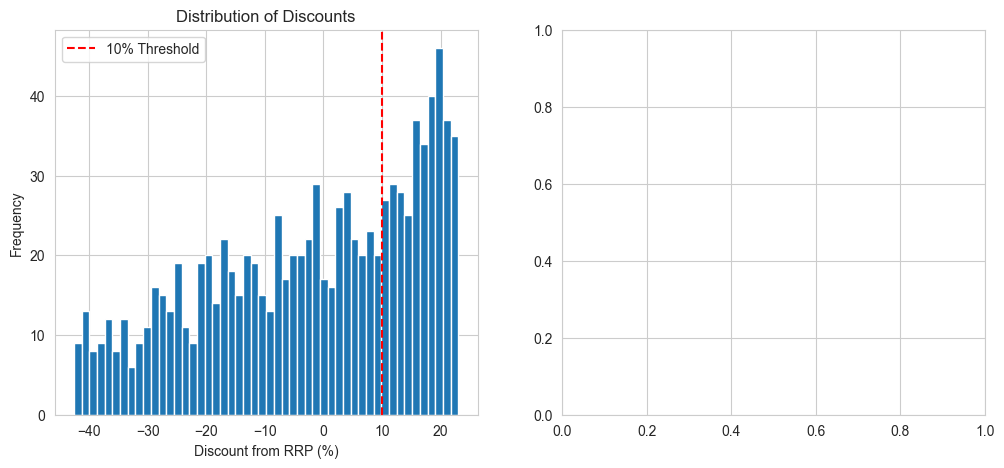

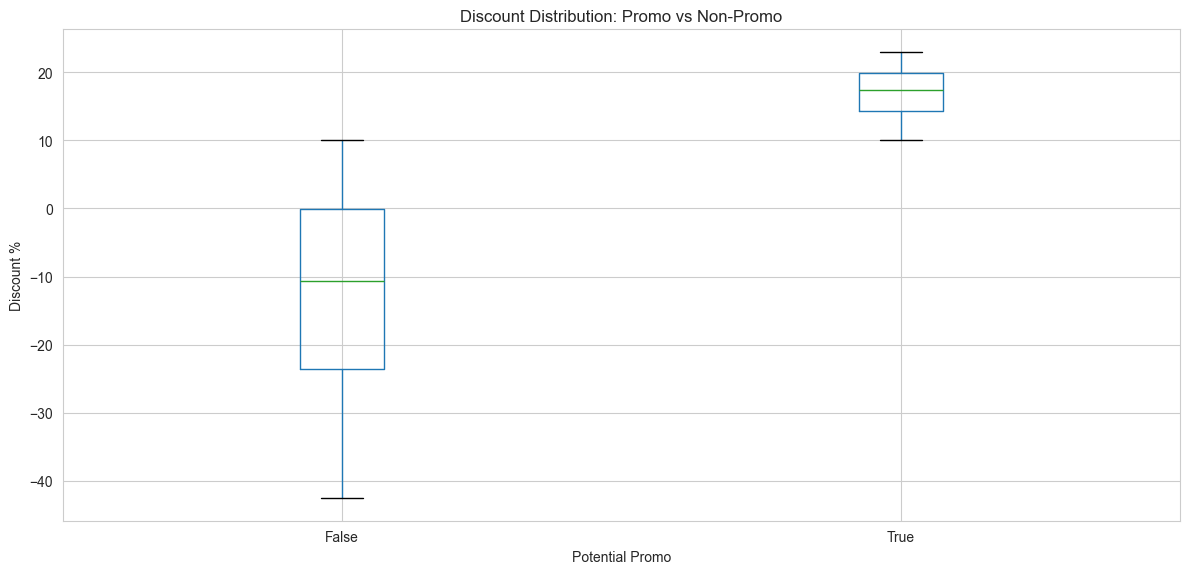

In [46]:
# Discount distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bidco_promo['discount_pct'].hist(bins=50)
plt.axvline(10, color='red', linestyle='--', label='10% Threshold')
plt.xlabel('Discount from RRP (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Discounts')
plt.legend()

plt.subplot(1, 2, 2)
bidco_promo.boxplot(column='discount_pct', by='potential_promo')
plt.suptitle('')
plt.title('Discount Distribution: Promo vs Non-Promo')
plt.xlabel('Potential Promo')
plt.ylabel('Discount %')

plt.tight_layout()
plt.show()

In [47]:
# SKUs with most promo days
promo_skus = bidco_promo[bidco_promo['potential_promo']].groupby('Description').agg({
    'Date Of Sale': 'nunique',
    'Store Name': 'nunique',
    'Quantity': 'sum',
    'discount_pct': 'mean'
}).sort_values('Date Of Sale', ascending=False).head(10)

promo_skus.columns = ['Promo Days', 'Stores', 'Total Quantity', 'Avg Discount %']
print("\nTop SKUs by Promotional Activity:")
print(promo_skus)


Top SKUs by Promotional Activity:
                                         Promo Days  Stores  Total Quantity  \
Description                                                                   
FD-SBF LUCOZADE ENERGY 250ML                      7      14           47.00   
FD-SBF RIBENA B/C&S/BERRY 250ML RTD               7      10           67.00   
FD-SBF RIBENA B/CURRANT 250ML RTD                 6      17          218.00   
BID GOLDEN FRY COOKING OIL 5L                     6      13          119.00   
FD-BID GOLD BAND MARGARINE 500G                   6      10           34.00   
FD-SBF LUCOZADE BOOST 1L                          6      10           35.00   
FD-SBF RIBENA BLACKCURRANT 1L RTD                 6      10           41.00   
FD-SFB-RIBENA CORDIAL 1LTR PET                    6       9           22.00   
FD-BID GOLD BAND MARGARINE 250G                   6       8           16.00   
HC-BID MSAFI PURPLE DET 1KG SACHETS-LAV           6       7          168.00   

                

## 5. Pricing Analysis

TOP 15 SUPPLIERS
                                           Total Sales  Quantity  Store Name  \
Supplier                                                                       
KAPA OIL REFINERIES LTD                     1580481.28   4144.00          35   
BIDCO AFRICA LIMITED                        1100192.69   4154.00          35   
HASBAH KENYA LTD                            1077898.09   5341.00          35   
COCA-COLA BEVERAGES KENYA LIMITED           1049859.86  11673.00          35   
UNILEVER KENYA LIMITED                       719008.48   3801.00          35   
PWANI OIL PRODUCTS LTD                       615714.52   1602.00          35   
FLORA FOOD SALES & DISTRIBUTION KENYA LTD    350505.12   1589.00          35   
TROPICAL HEAT LIMITED                        347905.09   3864.00          35   
TRUFOODS LIMITED                             322777.52   2957.00          35   
MENENGAI OIL REFINERIES LTD                  316108.52   1902.00          35   
KEVIAN KENYA LTD       

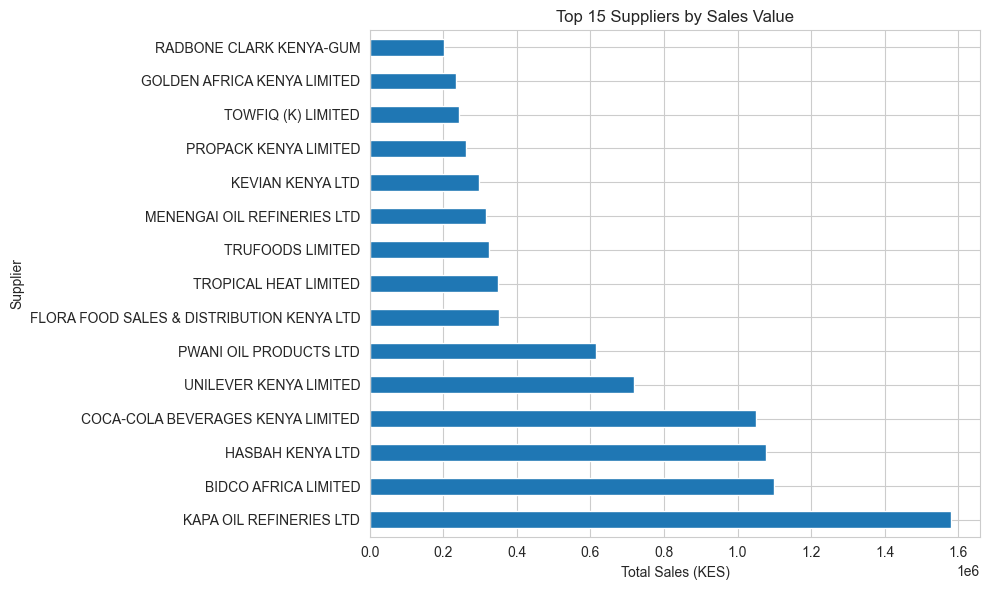

In [48]:
# Top suppliers by sales
top_suppliers = df_standard.groupby('Supplier').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Store Name': 'nunique',
    'Item_Code': 'nunique'
}).sort_values('Total Sales', ascending=False).head(15)

print("="*60)
print("TOP 15 SUPPLIERS")
print("="*60)
print(top_suppliers)

# Visualize
top_suppliers['Total Sales'].plot(kind='barh', figsize=(10, 6))
plt.title('Top 15 Suppliers by Sales Value')
plt.xlabel('Total Sales (KES)')
plt.tight_layout()
plt.show()